In [ ]:
pip install kaggle

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/core.py", line 4114, in parseImpl
    return e._parse(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/core.py", line 821, in _parseNoCache
    loc, tokens = self.parseImpl(instring, pre_loc, doActions)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pyparsing/core.py", line 2341, in parseImpl
    raise ParseException(instring, loc, self.errmsg, self)
pip._vendor.pyparsing.exceptions.Parse

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import zipfile
with zipfile.ZipFile('valoracion_aerolineas.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [ ]:
# Cargando el dataset
df_train = pd.read_csv('/content/dataset/train.csv')
df_test = pd.read_csv('/content/dataset/test.csv')
#print(df_train.head())
#print(df_test.head())

# Mostrando las columnas del dataset
print(df_train.columns)
#print(df_test.columns)

# Limpiamos los datos
df_train = df_train.dropna()
df_test = df_test.dropna()

# Obtiene el número de filas y columnas
filas_train, columnas_train = df_train.shape
print(f'El archivo CSV tiene {filas_train} filas y {columnas_train} columnas.')

filas_test, columnas_test = df_test.shape
print(f'El archivo CSV tiene {filas_test} filas y {columnas_test} columnas.')


Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
El archivo CSV tiene 103594 filas y 25 columnas.
El archivo CSV tiene 25893 filas y 25 columnas.


In [ ]:
data = df_train[['Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class','Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction']]
data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    103594 no

In [ ]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Analisis Variables Individuales


In [ ]:
gender = data["Gender"]
gender.describe()

In [ ]:
gender.value_counts().plot(kind="bar", color=["pink", "skyblue"], figsize=(4,4));
plt.title("Distribución de género");
plt.xlabel("Género");
plt.ylabel("Cantidad");

In [ ]:
age = data["Age"]

age.plot(kind="hist", bins=xbins, width=4.5, figsize=(5,4));
plt.xticks(xbins);

In [ ]:
data_sat = df_train[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]
data_sat

In [ ]:
data['satisfaction']

# Pregunta 1: ¿Cuál es el nivel general de satisfacción de los pasajeros?, ¿cuáles son los porcentajes?

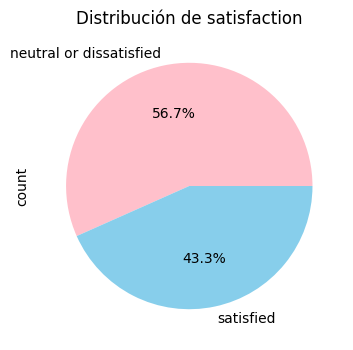

In [ ]:
satisfaction = data['satisfaction']
cantidad = satisfaction.value_counts()

cantidad.plot(kind="pie", colors=["pink", "skyblue"], figsize=(4,4), autopct='%1.1f%%');
plt.title("Distribución de satisfaction");
plt.show();

#Pregunta 2: ¿Cómo varía la satisfacción según el género de los pasajeros?

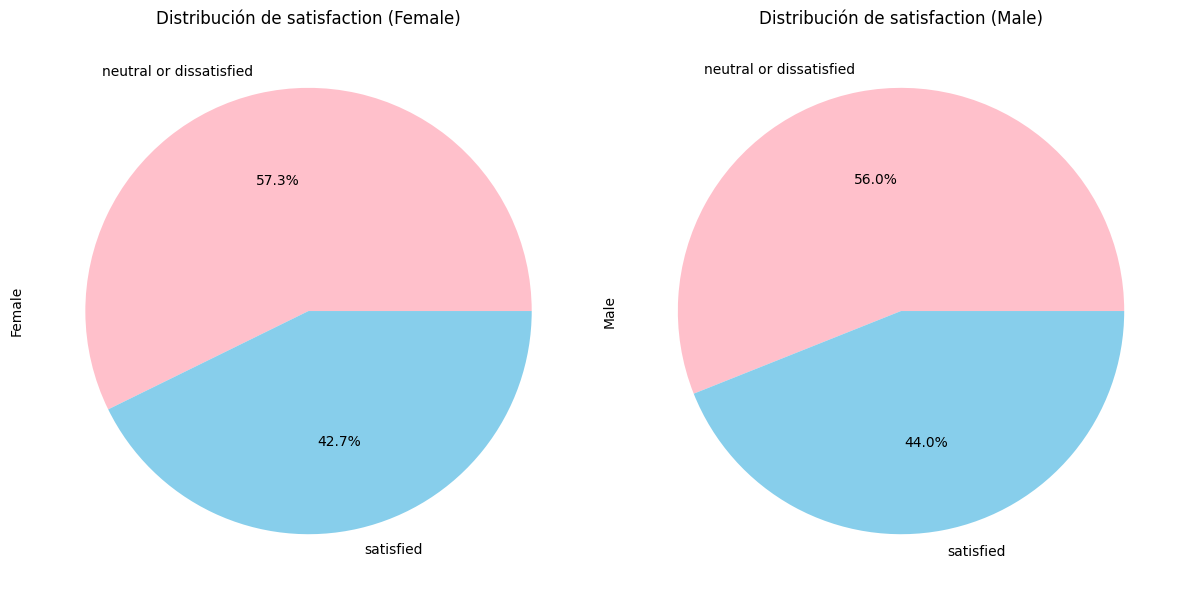

La diferencia entre la cantidad de mujeres satisfechas y hombres satisfechos es: 41
diferencia de 1.3% :V


In [ ]:
satisfaction_gender = data.groupby(['Gender', 'satisfaction']).size().unstack()

fig, axes = plt.subplots(1, len(satisfaction_gender), figsize=(12, 6))

colors = ["pink", "skyblue"]

for i, (gender, counts) in enumerate(satisfaction_gender.iterrows()):
    counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=axes[i])
    axes[i].set_title(f'Distribución de satisfaction ({gender})')

plt.tight_layout()
plt.show()

female_dissatisfaction = satisfaction_gender.loc['Female', 'satisfied']
male_dissatisfaction = satisfaction_gender.loc['Male', 'satisfied']
difference = female_dissatisfaction - male_dissatisfaction

print(f"La diferencia entre la cantidad de mujeres satisfechas y hombres satisfechos es: {difference}")
print("diferencia de 1.3% :V")

#Pregunta 3: ¿Hay diferencias significativas según el grupo de edad?

satisfaction  satisfied_pct  dissatisfied_pct
Age Group                                    
Segment 1         13.746391         86.253609
Segment 2         23.494774         76.505226
Segment 3         35.819351         64.180649
Segment 4         38.441174         61.558826
Segment 5         41.618113         58.381887
Segment 6         58.321920         41.678080
Segment 7         57.840361         42.159639
Segment 8         56.803119         43.196881
Segment 9         33.180939         66.819061
Segment 10        16.893039         83.106961
Segment 11        32.407407         67.592593
Segment 12        21.897810         78.102190


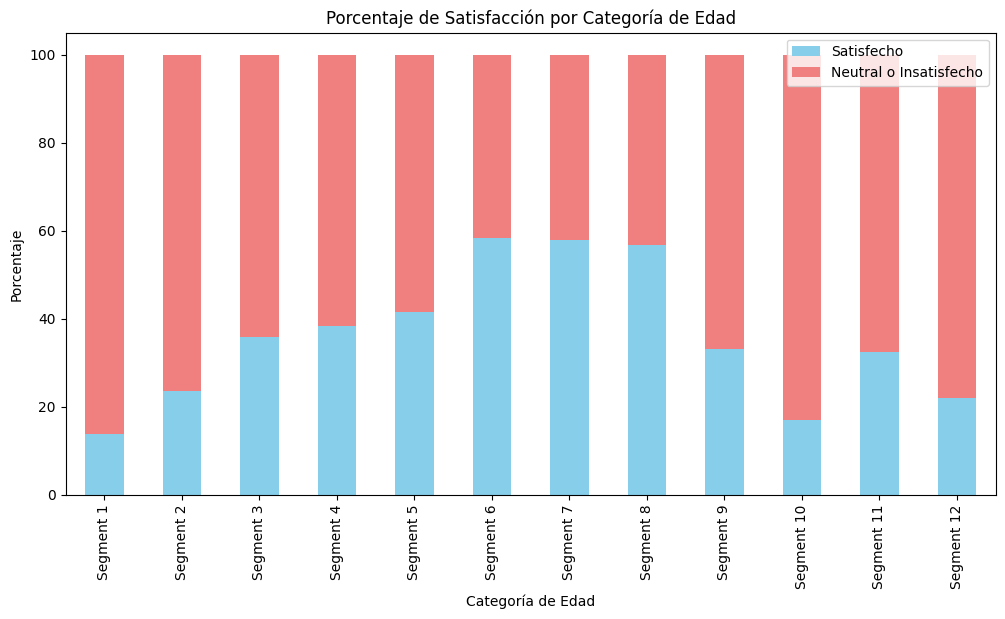

Chi-cuadrado: 8036.386905460357
p-valor: 0.0
Grados de libertad: 11
Hay diferencias significativas en la satisfacción según el grupo de edad (rechazamos la hipótesis nula).


In [ ]:
data['Age Group'] = pd.cut(data['Age'], bins=12, labels=[f'Segment {i}' for i in range(1, 13)])

# Calcular el porcentaje de satisfacción para cada categoría de edad
age_satisfaction = data.groupby(['Age Group', 'satisfaction']).size().unstack(fill_value=0)
age_satisfaction['Total'] = age_satisfaction.sum(axis=1)
age_satisfaction['satisfied_pct'] = (age_satisfaction['satisfied'] / age_satisfaction['Total']) * 100
age_satisfaction['dissatisfied_pct'] = (age_satisfaction['neutral or dissatisfied'] / age_satisfaction['Total']) * 100

# Mostrar los porcentajes de satisfacción y insatisfacción
print(age_satisfaction[['satisfied_pct', 'dissatisfied_pct']])

# Visualizar los resultados
fig, ax = plt.subplots(figsize=(12, 6))
age_satisfaction[['satisfied_pct', 'dissatisfied_pct']].plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'lightcoral'])
plt.title('Porcentaje de Satisfacción por Categoría de Edad')
plt.xlabel('Categoría de Edad')
plt.ylabel('Porcentaje')
plt.legend(['Satisfecho', 'Neutral o Insatisfecho'])
plt.show()

# Preparar los datos para la prueba Chi-cuadrado
contingency_table = data.pivot_table(index='Age Group', columns='satisfaction', aggfunc='size', fill_value=0)

# Realizar la prueba Chi-cuadrado de independencia
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Mostrar los resultados de la prueba Chi-cuadrado
print(f"Chi-cuadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Grados de libertad: {dof}")

# Interpretar el p-valor
alpha = 0.05
if p < alpha:
    print("Hay diferencias significativas en la satisfacción según el grupo de edad (rechazamos la hipótesis nula).")
else:
    print("No hay diferencias significativas en la satisfacción según el grupo de edad (no rechazamos la hipótesis nula).")

#Pregunta 4: ¿Qué diferencias existen en la satisfacción entre clientes leales y no leales?

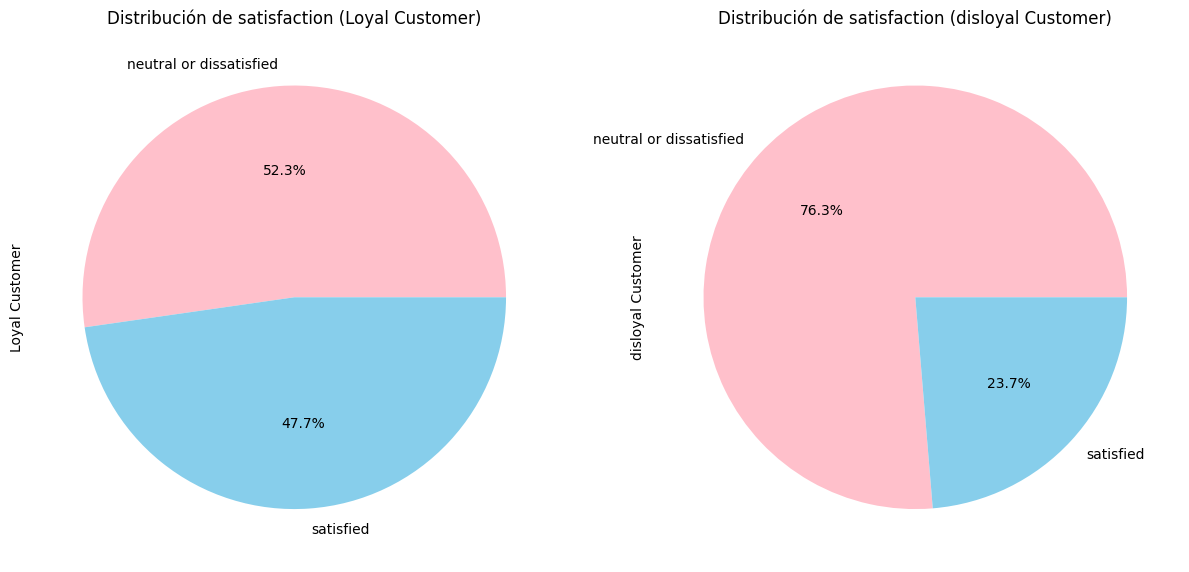

Clientes leales: Tienen una distribución de satisfacción más equilibrad con casi la mitad de ellos satisfechos (47.7%) y la otra mitad neutrales o insatisfechos (52.3%). Clientes desleales:   
  Tienen una mayor proporción de insatisfacción, 
  ya que una mayoría significativa (76.3%) está neutral o insatisfecha, y solo un 23.7% está satisfecha.


In [ ]:
satisfaction_gender = data.groupby(['Customer Type', 'satisfaction']).size().unstack()
satisfaction_gender
fig, axes = plt.subplots(1, len(satisfaction_gender), figsize=(12, 6))

colors = ["pink", "skyblue"]

for i, (gender, counts) in enumerate(satisfaction_gender.iterrows()):
    counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=axes[i])
    axes[i].set_title(f'Distribución de satisfaction ({gender})')

plt.tight_layout()
plt.show()

female_dissatisfaction = satisfaction_gender.loc['Loyal Customer', 'satisfied']
male_dissatisfaction = satisfaction_gender.loc['disloyal Customer', 'satisfied']
difference = female_dissatisfaction - male_dissatisfaction

print(f"Clientes leales: Tienen una distribución de satisfacción más equilibrad con casi la mitad de ellos satisfechos (47.7%) y la otra mitad neutrales o insatisfechos (52.3%). Clientes desleales: "," \n ", "Tienen una mayor proporción de insatisfacción,", "\n ","ya que una mayoría significativa (76.3%) está neutral o insatisfecha, y solo un 23.7% está satisfecha.")

# Pregunta 5: ¿Cómo afecta el tipo de viaje (Personal vs. de Negocios) la satisfacción del pasajero?


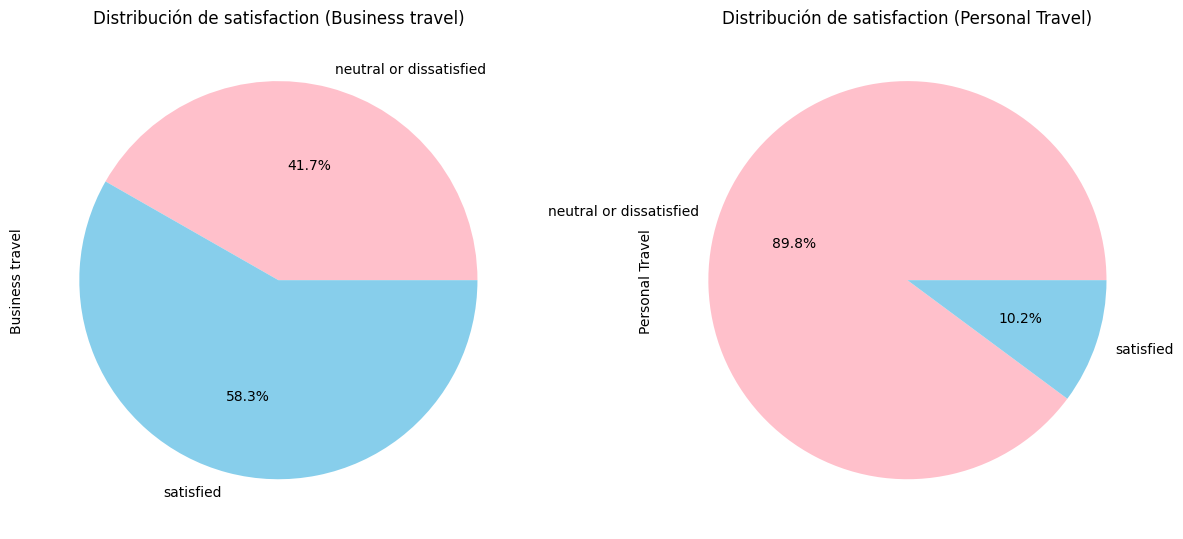

In [ ]:
data['Type of Travel']
satisfaction_gender = data.groupby(['Type of Travel', 'satisfaction']).size().unstack()
satisfaction_gender
fig, axes = plt.subplots(1, len(satisfaction_gender), figsize=(12, 6))

colors = ["pink", "skyblue"]

for i, (gender, counts) in enumerate(satisfaction_gender.iterrows()):
    counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=axes[i])
    axes[i].set_title(f'Distribución de satisfaction ({gender})')

plt.tight_layout()
plt.show()

female_dissatisfaction = satisfaction_gender.loc['Personal Travel', 'satisfied']
male_dissatisfaction = satisfaction_gender.loc['Business travel', 'satisfied']
difference = female_dissatisfaction - male_dissatisfaction

# Pregunta 6: ¿Qué servicios influyen más en la satisfacción general del pasajero (wifi, entretenimiento a bordo, comodidad del asiento, etc.)?

In [ ]:
df = pd.DataFrame(data)

# Seleccionar solo las columnas requeridas
selected_columns = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness",
    "satisfaction"
]

df_selected = df[selected_columns]

# Convertir la variable 'satisfaction' a valores numéricos
satisfaction = {'neutral or dissatisfied': 0, 'satisfied': 1}
df_selected['satisfaction'] = df_selected['satisfaction'].map(satisfaction)

# Calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Correlación con la satisfacción del pasajero
satisfaction_correlation = correlation_matrix['satisfaction'].drop('satisfaction')

# Ordenar por valor absoluto de correlación
satisfaction_correlation = satisfaction_correlation.abs().sort_values(ascending=False)

print("Correlación con la satisfacción del pasajero:")
print(satisfaction_correlation)

Correlación con la satisfacción del pasajero:
Online boarding                      0.503447
Inflight entertainment               0.398203
Seat comfort                         0.349112
On-board service                     0.322450
Leg room service                     0.313182
Cleanliness                          0.305050
Inflight wifi service                0.284163
Baggage handling                     0.247819
Inflight service                     0.244852
Checkin service                      0.235914
Food and drink                       0.209659
Ease of Online booking               0.171507
Departure/Arrival time convenient    0.051718
Gate location                        0.000449
Name: satisfaction, dtype: float64


<ipython-input-140-aacf36368501>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['satisfaction'] = df_selected['satisfaction'].map(satisfaction)


#Pregunta 7: ¿Cuáles son los servicios que satisfacen más y cuáles dejan más insatisfechos a la clase de Negocios?

---



In [ ]:
satisfaction_gender = data.groupby(['Type of Travel', 'satisfaction']).size().unstack()
satisfaction_gender
fig, axes = plt.subplots(1, len(satisfaction_gender), figsize=(12, 6))

colors = ["pink", "skyblue"]

for i, (gender, counts) in enumerate(satisfaction_gender.iterrows()):
    counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=axes[i])
    axes[i].set_title(f'Distribución de satisfaction ({gender})')

plt.tight_layout()
plt.show()

female_dissatisfaction = satisfaction_gender.loc['Personal Travel', 'satisfied']
male_dissatisfaction = satisfaction_gender.loc['Business travel', 'satisfied']
difference = female_dissatisfaction - male_dissatisfaction

In [ ]:
data['Type of Travel']

0         Personal Travel
1         Business travel
2         Business travel
3         Business travel
4         Business travel
               ...       
103899    Business travel
103900    Business travel
103901    Business travel
103902    Business travel
103903    Business travel
Name: Type of Travel, Length: 103594, dtype: object

In [ ]:
data_negocios = df_train[df_train['Type of Travel'] == 'Business Class']
business_class_df = df[df['Class'] == 'Business']

# Calcular la satisfacción promedio para cada servicio
satisfaction_means = business_class_df.groupby('Class').mean().T

# Seleccionar solo las columnas de los servicios
satisfaccion_servicios = satisfaccion_promedio[['Inflight wifi service',
                                                'Departure/Arrival time convenient',
                                                'Ease of Online booking',
                                                'Gate location',
                                                'Food and drink',
                                                'Online boarding',
                                                'Seat comfort',
                                                'Inflight entertainment',
                                                'On-board service',
                                                'Leg room service',
                                                'Baggage handling',
                                                'Checkin service',
                                                'Inflight service',
                                                'Cleanliness']]

# Calcular la satisfacción promedio general para cada servicio
satisfaccion_servicios.mean()
# Ordenar los servicios de acuerdo a la satisfacción promedio
satisfaccion_servicios_mean_sorted = satisfaccion_servicios_mean.sort_values(ascending=False)
#
## Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x=satisfaccion_servicios_mean_sorted.values, y=satisfaccion_servicios_mean_sorted.index, palette='viridis')
plt.title('Satisfacción Promedio de Servicios en la Clase de Negocios')
plt.xlabel('Satisfacción Promedio')
plt.ylabel('Servicio')
plt.show()

## Imprimir los servicios con mayor y menor satisfacción
print("Servicios que satisfacen más a la clase de Negocios:")
print(satisfaccion_servicios_mean_sorted.head(5))
print("\nServicios que dejan más insatisfechos a la clase de Negocios:")
print(satisfaccion_servicios_mean_sorted.tail(5))

NameError: name 'business_class_df' is not defined

In [ ]:
#Tarea de elian :)

df = pd.DataFrame(data)

# Seleccionar solo las columnas requeridas
selected_columns = [
    'Class',
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness",
    "satisfaction"
]

df_selected = df[selected_columns]

satisfaction = {'neutral or dissatisfied': 0, 'satisfied': 1}

df_selected['satisfaction'] = df_selected['satisfaction'].map(satisfaction)

# Filtrar solo las filas donde la clase sea "Business"
business_class_df = df_selected[df_selected['Class'] == 'Business']
#
## Calcular el promedio de satisfacción para cada servicio
satisfaction_means = business_class_df.groupby('Class').mean()
satisfaction_means.max()
#satisfaction_correlation = satisfaction_means.abs().sort_values(by='Business',ascending=False)
#satisfaction_correlation

## Ordenar por valor de satisfacción promedio
#satisfaction_means_sorted = satisfaction_means.sort_values(by='Business', ascending=False)
#
#print("Servicios que satisfacen más a la clase Business:")
#print(satisfaction_means_sorted.head())
##
#print("\nServicios que dejan más insatisfechos a la clase Business:")
#print(satisfaction_means_sorted.tail())

<ipython-input-161-0539381e8197>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['satisfaction'] = df_selected['satisfaction'].map(satisfaction)


Inflight wifi service                2.775221
Departure/Arrival time convenient    2.905820
Ease of Online booking               2.914077
Gate location                        2.983042
Food and drink                       3.322835
Online boarding                      3.716411
Seat comfort                         3.760786
Inflight entertainment               3.635395
On-board service                     3.679608
Leg room service                     3.644661
Baggage handling                     3.842812
Checkin service                      3.518987
Inflight service                     3.844447
Cleanliness                          3.477439
satisfaction                         0.694285
dtype: float64